# Capstone Project - The Battle of Neighborhoods (Week 2)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

### Introduction Business Problem section <a name="introduction"></a>

#### Background

While opening a restaurant can be a very lucrative business, a lack of demand causes many restaurants to close within the first year of opening. There are many different factors that can account for a restaurant’s success such as location, competition and quality of the food. This is an important question that every business owner must face when choosing whether to open a restaurant or not, as well as location of the business.

  Colombia has a growing economy that attracts a lot of international investor given its high potential to create large returns on capital. One of the most profitable business in the last years is the American restaurants that offers American style burgers. Thus, a lot of new burger restaurants have opened its doors in the past few years. However, a Chef believes that he has the best recipe for the perfect burger. He doesn’t want to compete against a lot of restaurants, so he wants to open his restaurant in a low-density zone or in a zone with bad rated restaurant so he can take all the unhappy clients. He is willing to invest all his savings in the restaurant to offer the best service and product to the costumer. For this reason, he needs to be sure that the place chosen will be the best in terms of surrounding restaurants.


#### Business Problem

Here we will try finding if someone wants to open a new restaurant in Colombia which location is best suited for it keeping in mind the competitors and which income group of people will be attracted most. We will consider variables as population of the city, density of American restaurants around and rating given by the people.


Since there are lots of restaurants in Colombia we will try to detect locations that aren´t crowded with restaurants. We would also prefer locations as close to city center as possible, assuming that first two conditions are met.

We will use our data science powers to generate a few most promising neighborhoods based on these criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.


### Data Selection  <a name="data"></a>

Data on Colombia cities and its population (https://en.wikipedia.org/wiki/List_of_cities_in_Colombia_by_population). We will import this databes in order to explore it, and choose the top 5 cities with the most population.


We will access data through FourSquare API interface and arrange them as a dataframe for visualization of American Restaurants in 5 the major Colombian cities which will be determinated based on the databes mentioned above. FourSquare will provide us with information abour surroiding restaurants and ratings. By merging data on colombian resturants and rating data, we will be able to recommend profitable real estate investments.


### Methodology section <a name="methodology"></a>

The main target here is to asses which city would have the lowest Amrican Restaurantdensity. I used the Four Square API through the venues channel. I used the near query to get venues in the cities. Also, I use the CategoryID to set it to show only American Restuarant type Places. An Example of my requests:

https://api.foursquare.com/v2/venues/explore?&client_id=&client_secret=&v=20180605&Bogota,&limit=100&categoryId=4bf58dd8d48988d14e941735

That 4bf58dd8d48988d14e941735 is the Id of the American Restaurantes. Also, Foursquare limits us to maximum of 100 venues per query.

Moreover, I repeated this request for the 5 studied cities and got their top 100 venues. I saved the name and coordinate data only from the result and plotted them on the map for visual inspection.

Next, to get an indicator of the density of The Restaurant Places, I calculated a center coordinate of the venues to get the mean longitude and latitude values. Then I calculated the mean of the Euclidean distance from each venue to the mean coordinates. That was my indicator; mean distance to the mean coordinate.

The Methodology section will describe the main components of our analysis and predication system. The Methodology section comprises four stages:

1. Collect Inspection Data
2. Explore and Understand Data
3. Modeling

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
from sklearn.cluster import KMeans
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe



print('Libraries imported.')

Libraries imported.


##### 1. Collect Inspection Data

In [2]:
wiki_url = requests.get('https://en.wikipedia.org/wiki/List_of_cities_in_Colombia_by_population').text

In [3]:
soup = BeautifulSoup(wiki_url, "lxml")

In [4]:
table=soup.find('table')

In [5]:
table

<table class="sortable wikitable" style="text-align:right;">
<tbody><tr>
<th>No.</th>
<th>City</th>
<th>Department</th>
<th>Population (2018 estimate)<sup class="reference" id="cite_ref-estimates_1-1"><a href="#cite_note-estimates-1">[1]</a></sup>
</th></tr>
<tr>
<td>1
</td>
<td align="left"><b><a href="/wiki/Bogot%C3%A1" title="Bogotá">Bogotá</a></b></td>
<td align="left">(Capital District)</td>
<td><span data-sort-value="7006818104700000000♠">8,181,047</span>
</td></tr>
<tr>
<td>2
</td>
<td align="left"><a href="/wiki/Medell%C3%ADn" title="Medellín">Medellín</a></td>
<td align="left"><a href="/wiki/Antioquia_Department" title="Antioquia Department">Antioquia</a></td>
<td><span data-sort-value="7006252940300000000♠">2,529,403</span>
</td></tr>
<tr>
<td>3
</td>
<td align="left"><a href="/wiki/Cali" title="Cali">Cali</a></td>
<td align="left"><a href="/wiki/Valle_del_Cauca_Department" title="Valle del Cauca Department">Valle del Cauca</a></td>
<td><span data-sort-value="7006244540500000

In [6]:
column_names = ['No.','City','Department','Populaiton']
df = pd.DataFrame(columns = column_names)

In [7]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td align="left"'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

In [8]:
df = pd.read_csv("CitiesBog.csv")

In [9]:
df.head(5)

,No.,City,Department,Population
0,1,Bogotá,(Capital District),8181047
1,2,Medellín,Antioquia,2529403
2,3,Cali,Valle del Cauca,2445405
3,4,Barranquilla,Atlántico,1232462
4,5,Cartagena,Bolívar,1036134


#### 2. Explore and Understand Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

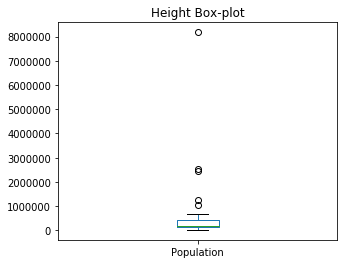

In [11]:
plt.figure(figsize=(5, 4))

df['Population'].plot(kind = 'box',
            title = 'Height Box-plot')

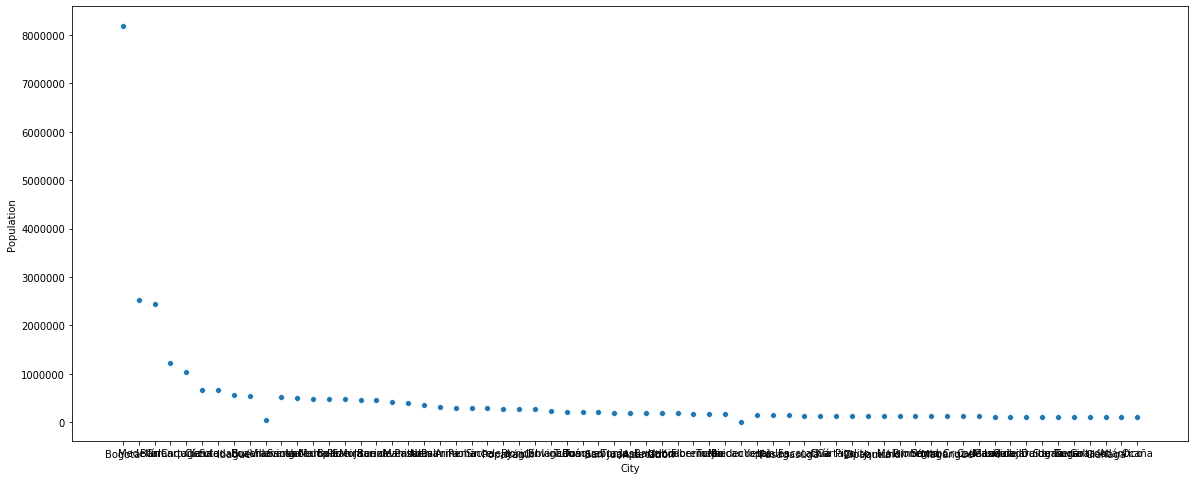

In [12]:
plt.figure(figsize=(20, 8))

sns.scatterplot(x = "City", y = "Population", data=df)

### Analysis  <a name="analysis"></a>

The next step was to visualize the number of restaurants in different cities of Colombian to obtain a general understanding of the distribution and density of restaurants. As seen from the map, all the cities are densely clustered near downtown and spread out as the distance from downtown increases. This phenomenon can specially be watched in cities such as Medellin and Bogotá. This is important because while some cities might not have many restaurants, if the area is located near downtown, adjacent regions can heavily impact the profitability of the restaurant

In [13]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)

Your credentails:
CLIENT_ID: 5ISTHVS3UICVGCO4CPVZDPC55LETT41R4IKME0B1J2E2H2YT


In [14]:
# type your answer here
LIMIT = 100 # Maximum is 100
cities = ["Bogota", 'Cali', 'Medellin', 'Barranquilla', 'Cartagena']
results = {}
for city in cities:
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&limit={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        city,
        LIMIT,
        "4bf58dd8d48988d14e941735") # American Restaurant
    results[city] = requests.get(url).json()

In [15]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [16]:
df_venues={}
for city in cities:
    venues = json_normalize(results[city]['response']['groups'][0]['items'])
    df_venues[city] = venues[['venue.name', 'venue.location.address', 'venue.location.lat', 'venue.location.lng']]
    df_venues[city].columns = ['Name', 'Address', 'Lat', 'Lng']

In [17]:
maps = {}
for city in cities:
    city_lat = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lat'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lat']])
    city_lng = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lng'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lng']])
    maps[city] = folium.Map(location=[city_lat, city_lng], zoom_start=11)

    # add markers to map
    for lat, lng, label in zip(df_venues[city]['Lat'], df_venues[city]['Lng'], df_venues[city]['Name']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(maps[city])  
    print(f"Total number of amaerican Restaurants in {city} = ", results[city]['response']['totalResults'])
    print("Showing Top 100")

Total number of amaerican Restaurants in Bogota =  105
Showing Top 100
Total number of amaerican Restaurants in Cali =  20
Showing Top 100
Total number of amaerican Restaurants in Medellin =  20
Showing Top 100
Total number of amaerican Restaurants in Barranquilla =  9
Showing Top 100
Total number of amaerican Restaurants in Cartagena =  12
Showing Top 100


In [18]:
maps[cities[0]]


In [19]:
maps[cities[1]]


In [20]:
maps[cities[2]]


In [21]:
maps[cities[3]]


In [22]:
maps[cities[4]]


We can see that Barranquilla and Cartagena are the least dense cities with American Restaurantes. However, Let's have a concrete measure of this density.

For this I will use some basic statistics. I will get the mean location of the restaurants which should be near to most of them if they are really dense or far if not.

Next I will take the average of the distance of the venues to the mean coordinates.

In [23]:
for city in cities:
    city_lat = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lat'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lat']])
    city_lng = np.mean([results[city]['response']['geocode']['geometry']['bounds']['ne']['lng'],
                        results[city]['response']['geocode']['geometry']['bounds']['sw']['lng']])
    maps[city] = folium.Map(location=[city_lat, city_lng], zoom_start=11)
    venues_mean_coor = [df_venues[city]['Lat'].mean(), df_venues[city]['Lng'].mean()] 
    # add markers to map
    for lat, lng, label in zip(df_venues[city]['Lat'], df_venues[city]['Lng'], df_venues[city]['Name']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(maps[city])
        folium.PolyLine([venues_mean_coor, [lat, lng]], color="green", weight=1.5, opacity=0.5).add_to(maps[city])
    
    label = folium.Popup("Mean Co-ordinate", parse_html=True)
    folium.CircleMarker(
        venues_mean_coor,
        radius=10,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(maps[city])

    print(city)
    print("Mean Distance from Mean coordinates")
    print(np.mean(np.apply_along_axis(lambda x: np.linalg.norm(x - venues_mean_coor),1,df_venues[city][['Lat','Lng']].values)))

Bogota
Mean Distance from Mean coordinates
0.03575212287768544
Cali
Mean Distance from Mean coordinates
0.031154836640530197
Medellin
Mean Distance from Mean coordinates
0.015802302081494957
Barranquilla
Mean Distance from Mean coordinates
0.018542260385503873
Cartagena
Mean Distance from Mean coordinates
0.02448192626573852


### Results and Discusión  <a name="results"></a>

Upon First inspection we see that Bogotá, Cali and Medellin are the most densely cities. In the next phase we Calculate the Mean coordinate and the mean distance to mean coordinate(MDMC). We represent the mean coordinate with a big green circle and distances with green lines

In [24]:
maps[cities[0]]


In [25]:
maps[cities[1]]

In [26]:
maps[cities[2]]

In [27]:
maps[cities[3]]

In [28]:
maps[cities[4]]


As we can see, Bogota es the biggest city in terms of population however by far it has 100 or more restaurants all over de city, thus the market shar will be really small and would have to invest a lot of money to outstand the other good restaurants.  On the other hand, the other Cities such as as Medellín, Cali, Barranquilla or Cartagena, only have about 20 or less American restaurants so there is a big market to explore a lot of clients to attract. Moreover, cities as Medellín and Cali also has a big amount of population so this two are the ideal city to choose. As I sa before I would consider heach city as a cluster, thus me cost function will be base on the city with the least Euclidian distance from the center to every restaurant. That means that for a client would be easier to reach my restaurant. Base on all of the above criteria, Medellin was chosen as the best city to open an American Restaurant.

As bogotá has the biggest mean, I deleted the 5 farest restaurant to check the results, but it dindt changed a lot.

In [31]:
city = 'Bogota'
venues_mean_coor = [df_venues[city]['Lat'].mean(), df_venues[city]['Lng'].mean()] 

print(city)
print("Mean Distance from Mean coordinates")
dists = np.apply_along_axis(lambda x: np.linalg.norm(x - venues_mean_coor),1,df_venues[city][['Lat','Lng']].values)
dists.sort()
print(np.mean(dists[:-5]))# Ignore the biggest distance

Bogota
Mean Distance from Mean coordinates
0.032763185884142905


### Conclusion  <a name="conclusion"></a>

Opening a restaurant is a complex task that can lead to a large monetary loss if not done properly. Thus, extensive research about the area would greatly increase the likelihood of the restaurant succeeding. From the project above, I demonstrated the workflow necessary for a client to determine what area the restaurant should open. For specifically, I determined that the optimal location to open an American Restaurant in Colombia, would be in Medellin.